Reference : https://www.kaggle.com/n4srin/stock-prediction-linear-regression

In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
userhome = os.path.expanduser('~')
csvfile = userhome + r'/Desktop/Python/End2EndProjects/Data/Amazon.csv'
df = pd.read_csv(csvfile)

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [6]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
Min_date = df.index.min()
Max_date = df.index.max()
print ("First date is",Min_date)
print ("Last date is",Max_date)
print (Max_date - Min_date)

First date is 1997-05-15 00:00:00
Last date is 2020-08-14 00:00:00
8492 days 00:00:00


In [8]:
df = df.drop(columns=['High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [9]:
print(df.head())
print(df.shape)

                Open
Date                
1997-05-15  2.437500
1997-05-16  1.968750
1997-05-19  1.760417
1997-05-20  1.729167
1997-05-21  1.635417
(5852, 1)


pandas **shift** : shifts index axis by n periods in negative(here since - num specified) direction ,i.e value of nth row will be set to first row in Forecast column.
https://www.geeksforgeeks.org/python-pandas-dataframe-shift/

In [12]:
# Creating new column 
num = 20 # forcasting 20 days ahead
df['label'] = df['Open'].shift(-num) # forcasting open column
print(df.shape)

(5852, 2)


In [13]:
df.head()

,Open,label
Date,,
1997-05-15,2.437500,1.625000
1997-05-16,1.968750,1.604167
1997-05-19,1.760417,1.598958
1997-05-20,1.729167,1.520833
1997-05-21,1.635417,1.510417


In [14]:
Data = df.drop(['label'],axis=1)

In [15]:
X = Data.values
X = preprocessing.scale(X) 
X = X[:-num]  # X will contain everything except last num items after scaling
X

array([[-0.62899504],
       [-0.62978122],
       [-0.63013063],
       ...,
       [ 4.53300692],
       [ 4.34990967],
       [ 4.41354166]])

In [16]:
df.dropna(inplace=True)
Target = df.label
y = Target.values
y

array([1.62500000e+00, 1.60416700e+00, 1.59895800e+00, ...,
       3.10800000e+03, 3.18298999e+03, 3.17817993e+03])

In [17]:
print(np.shape(X), np.shape(y))

(5832, 1) (5832,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test , y_test) #Returns the coefficient of determination R^2 of the prediction

0.9901392500465687

In [20]:
X_Predict = X[-num:] # last num items in array
Forecast = model.predict(X_Predict)
print(Forecast)

[2760.43864875 2767.05789434 2809.86701407 2865.52294648 2823.8171189
 2860.42963184 2772.7389773  2767.64566163 2842.82957703 3001.63155923
 3025.30437343 3152.72132446 3115.66553113 3211.94464159 3290.06714388
 3351.20832102 3184.11667538 3175.07436673 3062.51497444 3101.63286207]


In [21]:
Date = np.array(df.index) 
last_Date = Date[len(Date)-1]
print(last_Date)

2020-07-17T00:00:00.000000000


In [27]:
# creating timeserie from the last date

trange = pd.date_range('2020-07-17', periods=num, freq='d')
trange

DatetimeIndex(['2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01',
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05'],
              dtype='datetime64[ns]', freq='D')

In [28]:
# Adding the predicted values to dateframe
Predict_df = pd.DataFrame(Forecast, index=trange)
Predict_df.columns = ['Forecast']
Predict_df

,Forecast
2020-07-17,2760.438649
2020-07-18,2767.057894
2020-07-19,2809.867014
2020-07-20,2865.522946
2020-07-21,2823.817119
2020-07-22,2860.429632
2020-07-23,2772.738977
2020-07-24,2767.645662
2020-07-25,2842.829577
2020-07-26,3001.631559


In [29]:
df_concat = pd.concat([df, Predict_df], axis=1)
df_concat.tail(num)

,Open,label,Forecast
2020-07-17,3009.0,3178.179932,2760.438649
2020-07-18,NaN,NaN,2767.057894
2020-07-19,NaN,NaN,2809.867014
2020-07-20,NaN,NaN,2865.522946
2020-07-21,NaN,NaN,2823.817119
2020-07-22,NaN,NaN,2860.429632
2020-07-23,NaN,NaN,2772.738977
2020-07-24,NaN,NaN,2767.645662
2020-07-25,NaN,NaN,2842.829577
2020-07-26,NaN,NaN,3001.631559


## plt.show() should come after plt.savefig as it clears all data and if we don't do this we will get blank image.

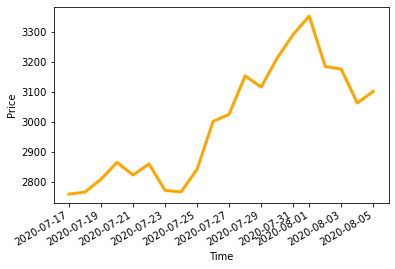

In [30]:
df_concat['Forecast'].plot(color='orange', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Price')
plt.savefig(userhome + r'/Desktop/Python/End2EndProjects/Amazon_API/static/img/plot.png')
plt.show()


# Plotting actual and predicted data

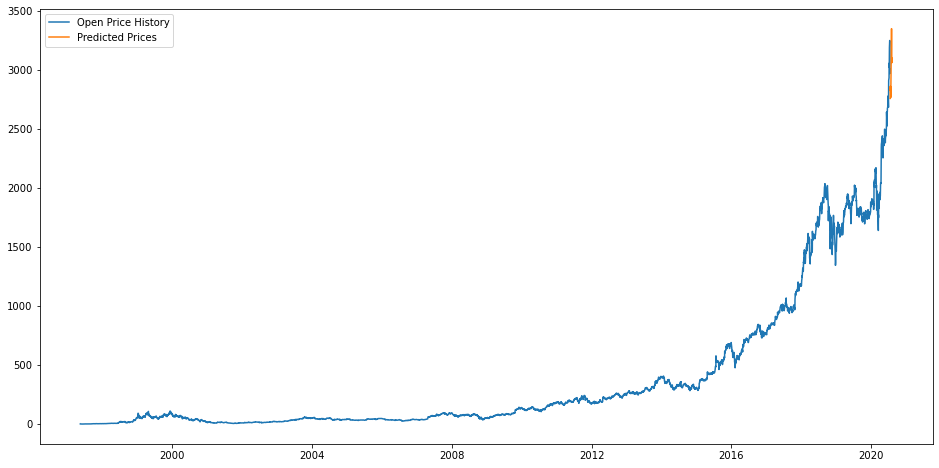

In [31]:
#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(df['Open'], label='Open Price History')
plt.plot(df_concat['Forecast'], label='Predicted Prices')

#display the legends
plt.legend()
#display the graph
plt.show()